In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import read_params_and_metrics, graficar_correlacion

id = ["name", "run_uuid"]
architecture = [
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_dim",
    "arc_latent_volume",
    "arc_skip",
    "arc_encoder_blocks",
]

train = ["train_loss", "train_Accuracy", "train_Accuracy_seq"]

valid = ["valid_loss", "valid_Accuracy", "valid_Accuracy_seq"]

test = [
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]

columns = id + architecture + train + valid + test

In [53]:
BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
v4p = "notebooks/from_db/Unet/selection/v4p/"
# v4c = "notebooks/from_db/Unet/selection/v4c/"
v4p_e1 = "notebooks/from_db/Unet/selection/v4p_e1/"
v4p_f0 = "notebooks/from_db/Unet/selection/v4p_f0/"

In [54]:
v4p, _ = read_params_and_metrics(BASE_PATH, v4p, columns)
# v4c, _ = read_params_and_metrics(BASE_PATH, v4c, columns)
v4p_e1, _ = read_params_and_metrics(BASE_PATH, v4p_e1, columns)
v4p_f0, _ = read_params_and_metrics(BASE_PATH, v4p_f0, columns)

In [55]:
data = pd.concat([v4p, v4p_e1, v4p_f0])

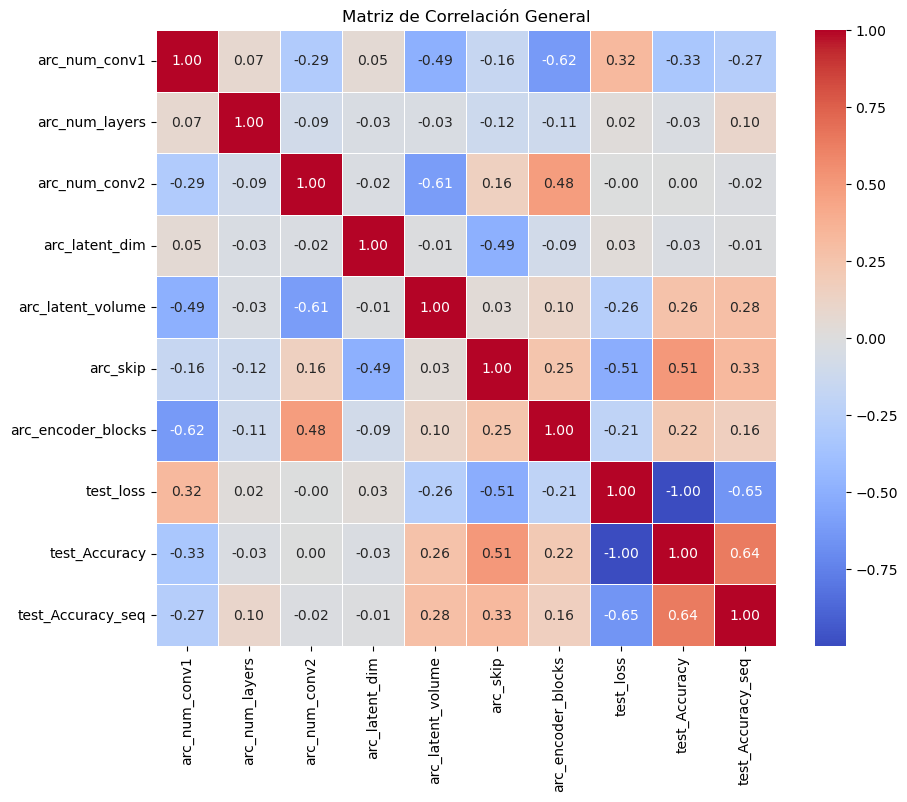

In [56]:
graficar_correlacion(data, architecture + test, "Matriz de Correlación General")

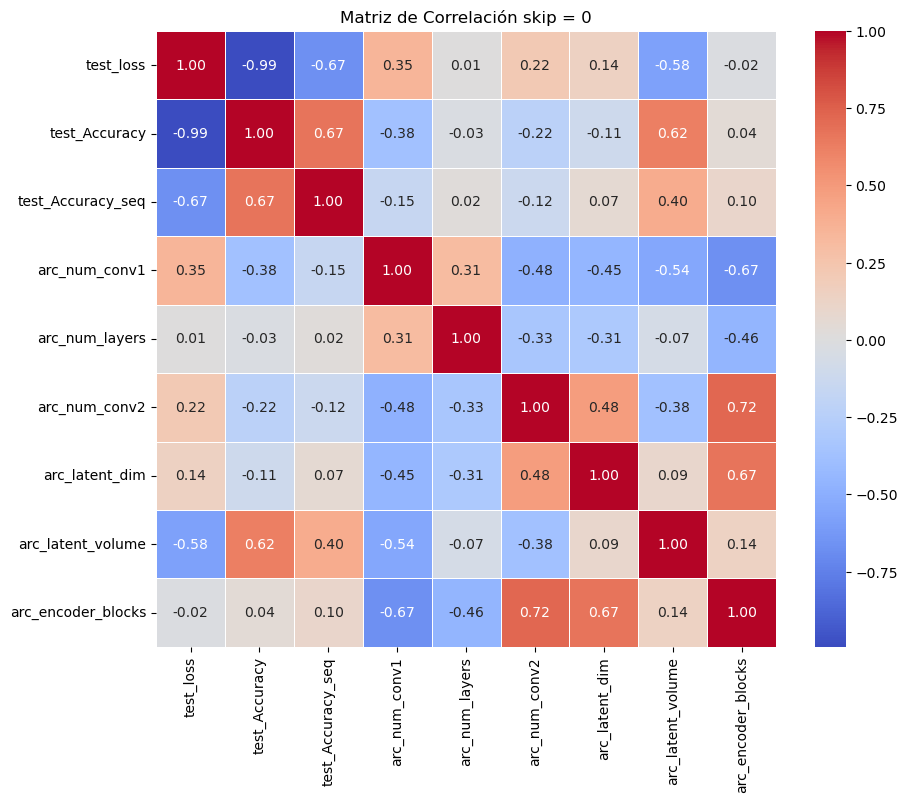

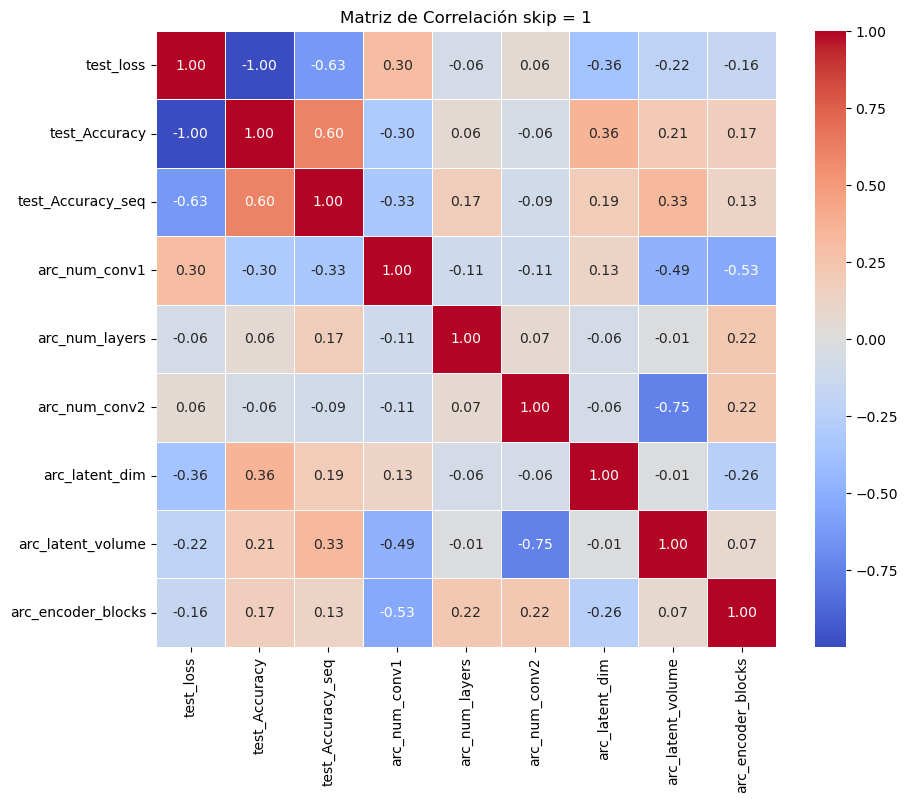

In [57]:
for s in [0, 1]:
    graficar_correlacion(
        data[data["arc_skip"] == s],
        test + [a for a in architecture if a != "arc_skip"],
        "Matriz de Correlación skip = " + str(s),
    )

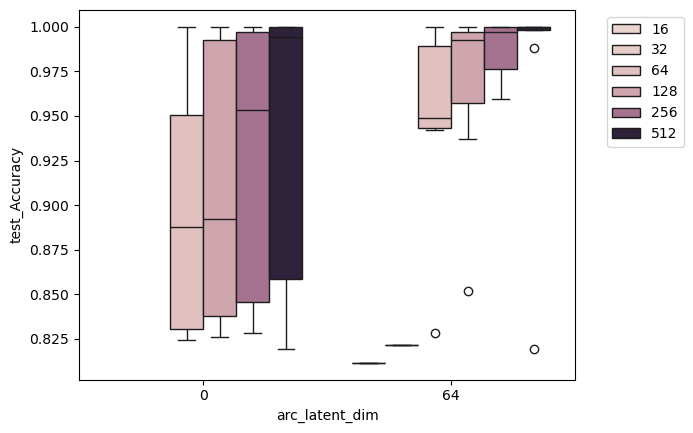

In [58]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 1],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

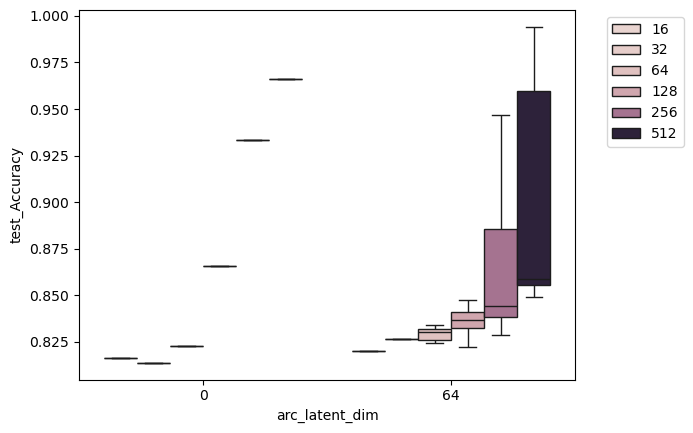

In [59]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 0],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

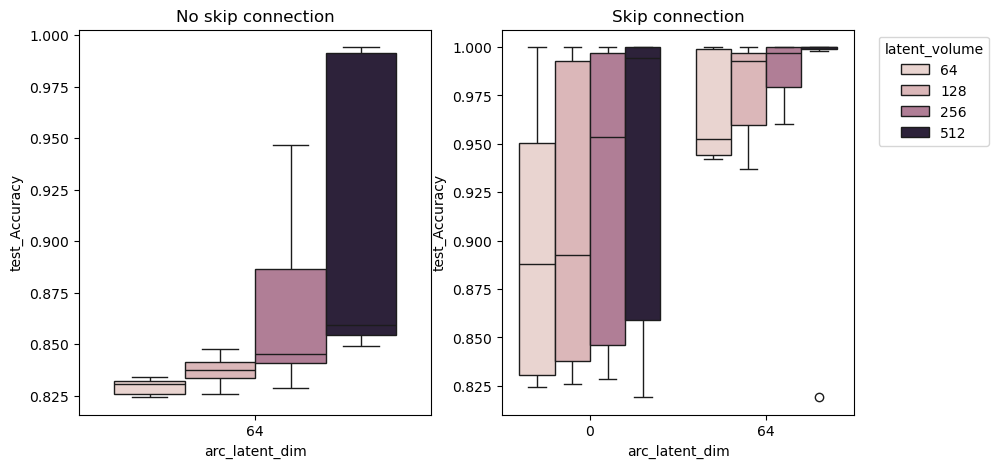

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)
ax[1].legend(title="latent_volume", bbox_to_anchor=(1.05, 1), loc="upper left")

In [69]:
data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)]

,name,run_uuid,arc_num_conv1,arc_num_layers,arc_num_conv2,arc_latent_dim,arc_latent_volume,arc_skip,arc_encoder_blocks,train_loss,train_Accuracy,train_Accuracy_seq,valid_loss,valid_Accuracy,valid_Accuracy_seq,test_loss,test_Accuracy,test_Accuracy_seq
3,A_nc1-resnet0-nc1-2encode-flat1-skip1,529e8931d538446fa99938f61f4e2a7a,1,0,1,64,512,1,2,0.004400,0.998089,0.380274,0.004897,0.997489,0.163265,0.000042,1.000000,1.000000
4,A_nc1-resnet0-nc1-2encode-flat1-skip1,529e8931d538446fa99938f61f4e2a7a,1,0,1,64,512,1,2,0.004400,0.998089,0.380274,0.004897,0.997489,0.163265,0.002566,0.999848,0.961207
5,A_nc1-resnet0-nc1-2encode-flat1-skip1,529e8931d538446fa99938f61f4e2a7a,1,0,1,64,512,1,2,0.004400,0.998089,0.380274,0.004897,0.997489,0.163265,0.003708,0.998661,0.556034
6,A_nc1-resnet0-nc1-2encode-flat1-skip1,529e8931d538446fa99938f61f4e2a7a,1,0,1,64,512,1,2,0.004400,0.998089,0.380274,0.004897,0.997489,0.163265,0.127486,0.819159,0.000000
10,A_nc1-resnet0-nc2-2encode-flat1-skip1,fa71e205d4ed473d9c81fe6c423f03a2,1,0,2,64,256,1,2,0.004246,0.999562,0.852321,0.004970,0.999223,0.744898,0.004230,0.999882,0.939655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,A_nc2-resnet2-nc3-2encode-flat1-skip0,e7597f7106dd4f60bbae1803fc49dfa8,2,2,3,0,64,1,2,0.120341,0.836934,0.000000,0.128744,0.825255,0.000000,0.130842,0.825751,0.000000
105,A_nc2-resnet2-nc3-2encode-flat1-skip0,e7597f7106dd4f60bbae1803fc49dfa8,2,2,3,0,64,1,2,0.120341,0.836934,0.000000,0.128744,0.825255,0.000000,0.131716,0.830592,0.000000
106,A_nc2-resnet2-nc3-2encode-flat1-skip1,a483be93e2f14d569353c26fe514854f,2,2,3,0,64,1,2,0.044080,0.953059,0.000000,0.047670,0.944575,0.000000,0.000368,0.999983,0.991379
107,A_nc2-resnet2-nc3-2encode-flat1-skip1,a483be93e2f14d569353c26fe514854f,2,2,3,0,64,1,2,0.044080,0.953059,0.000000,0.047670,0.944575,0.000000,0.038619,0.952249,0.000000


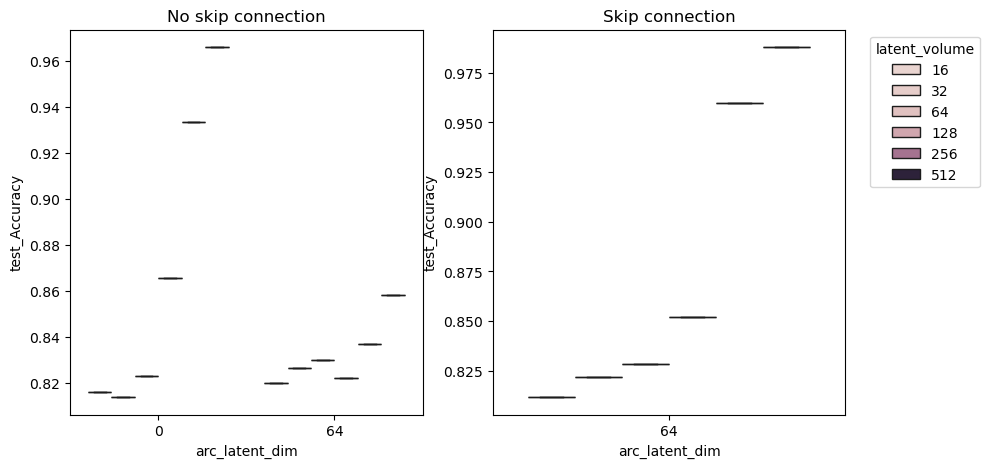

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)
ax[1].legend(title="latent_volume", bbox_to_anchor=(1.05, 1), loc="upper left")

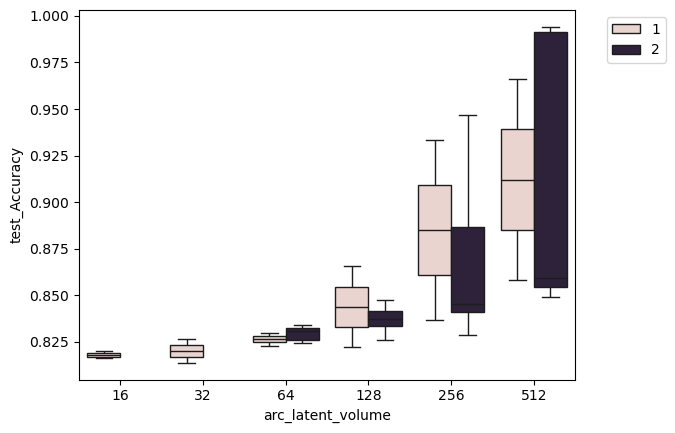

In [62]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 0],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_encoder_blocks",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")